In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
import tensorflow as tf


In [89]:
(X_train, y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [90]:
len(X_train)

60000

In [91]:
X_train.shape

(60000, 28, 28)

In [92]:
 X_test.shape

(10000, 28, 28)

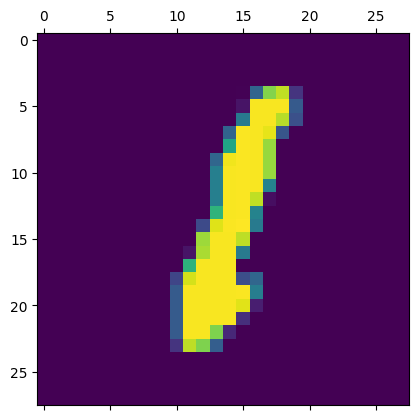

In [93]:
rnd=np.random.randint(0,len(X_train)-1)
plt.matshow(X_train[rnd])

In [94]:
y_train[rnd]

1

In [95]:
X_train_flatten = X_train.reshape(len(X_train),28*28)/255
X_test_flatten = X_test.reshape(len(X_test),28*28)/255

In [96]:
X_train_flatten.shape,X_test_flatten.shape

((60000, 784), (10000, 784))

In [97]:
X_train_flatten[0].shape

(784,)

In [98]:
def convert_to_one_hot(y, num_classes):
    num_samples = len(y)
    one_hot_labels = np.zeros((num_samples, num_classes))

    for i in range(num_samples):
        one_hot_labels[i, y[i]] = 1

    return one_hot_labels

In [99]:
y_train_one_hot,y_test_one_hot = convert_to_one_hot(y_train,10),convert_to_one_hot(y_test,10)
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [100]:
def create_fcnn_model(hidden_units ):
    num_classes=10
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(hidden_units[0], activation='relu', input_shape=(784,)))
    # Add one or more hidden layers with specified number of units
    for units in hidden_units[1:]:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    # Output layer with softmax activation for classification
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               157000    
                                                                 
 dense_5 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159010 (621.13 KB)
Trainable params: 159010 (621.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [105]:
epochs = 10
batch_size=32

In [103]:
train_data, val_data, train_labels, val_labels = train_test_split(X_train_flatten, y_train_one_hot, test_size=0.2, random_state=42)

In [118]:
def one_hot_to_categorical(one_hot_labels):
    return np.argmax(one_hot_labels, axis=1)

def plot_confusion_matrix(y_test, y_pred, classes=[0,1,2,3,4,5,6,7,8,9], title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def make_and_test_model(hidden_units):
    model = create_fcnn_model(hidden_units)
    print("MOdel summary---------->>")
    print(model.summary())
    print()
    model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_data, val_labels))
    print("Model training done------------")
    y_pred_one_hot = model.predict(X_test_flatten)

    y_pred = one_hot_to_categorical(y_pred_one_hot)
    print("Plotting confusion matrix")
    plot_confusion_matrix(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    return [model,y_pred]

MOdel summary---------->>
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2956 - accuracy: 0.9161 - val_loss: 0.1756 - val_accuracy: 0.9492
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1379 - accuracy: 0.9600 - val_loss: 0.1355 - val_accuracy: 0.9594
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0985 - accurac

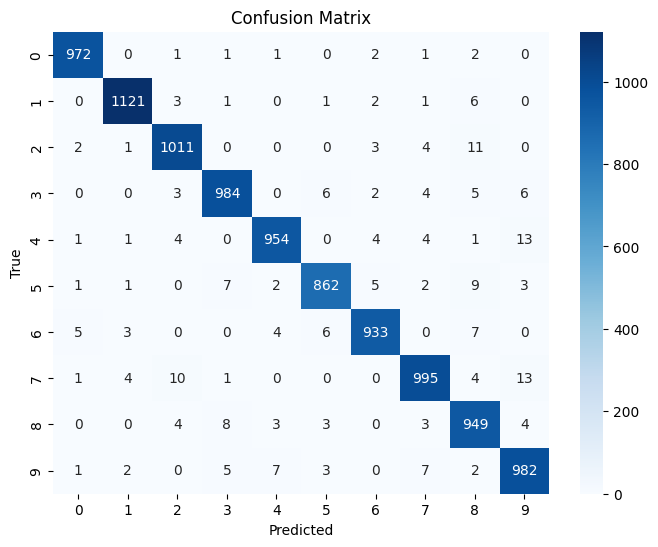

Confusion Matrix:
 [[ 972    0    1    1    1    0    2    1    2    0]
 [   0 1121    3    1    0    1    2    1    6    0]
 [   2    1 1011    0    0    0    3    4   11    0]
 [   0    0    3  984    0    6    2    4    5    6]
 [   1    1    4    0  954    0    4    4    1   13]
 [   1    1    0    7    2  862    5    2    9    3]
 [   5    3    0    0    4    6  933    0    7    0]
 [   1    4   10    1    0    0    0  995    4   13]
 [   0    0    4    8    3    3    0    3  949    4]
 [   1    2    0    5    7    3    0    7    2  982]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.98    

In [119]:
model,y_pred=make_and_test_model([100])


MOdel summary---------->>
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Epoch 1/10
1500/1500 [==============================] - 15s 9ms/step - loss: 0.2674 - accuracy: 0.9219 - val_loss: 0.1360 - val_accuracy: 0.9600
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1177 - accuracy: 0.9645

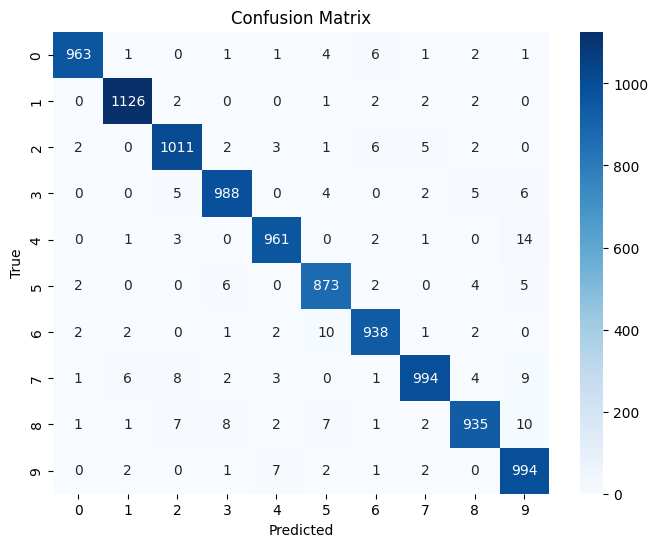

Confusion Matrix:
 [[ 963    1    0    1    1    4    6    1    2    1]
 [   0 1126    2    0    0    1    2    2    2    0]
 [   2    0 1011    2    3    1    6    5    2    0]
 [   0    0    5  988    0    4    0    2    5    6]
 [   0    1    3    0  961    0    2    1    0   14]
 [   2    0    0    6    0  873    2    0    4    5]
 [   2    2    0    1    2   10  938    1    2    0]
 [   1    6    8    2    3    0    1  994    4    9]
 [   1    1    7    8    2    7    1    2  935   10]
 [   0    2    0    1    7    2    1    2    0  994]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98    

In [120]:
model,y_pred=make_and_test_model([128,64])

MOdel summary---------->>
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 200)               157000    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Epoch 1/10
1500/1500 [==============================] - 15s 9ms/step - loss: 0.2364 - accuracy: 0.9302 - val_loss: 0.1302 - val_accuracy: 0.9610
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1016 - accuracy: 0.9681

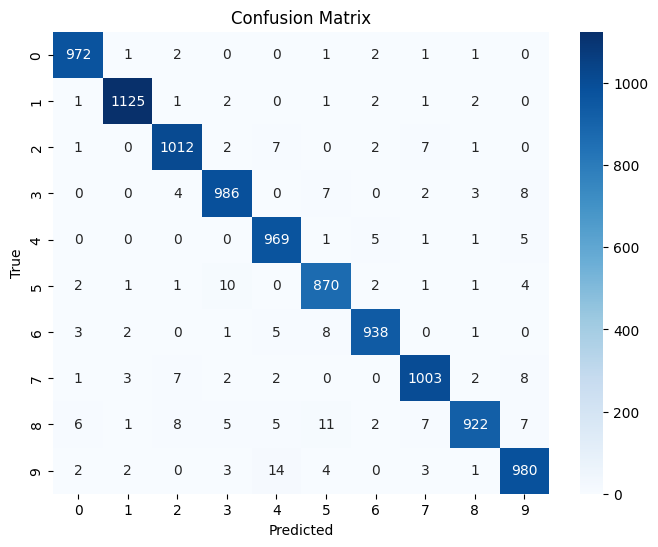

Confusion Matrix:
 [[ 972    1    2    0    0    1    2    1    1    0]
 [   1 1125    1    2    0    1    2    1    2    0]
 [   1    0 1012    2    7    0    2    7    1    0]
 [   0    0    4  986    0    7    0    2    3    8]
 [   0    0    0    0  969    1    5    1    1    5]
 [   2    1    1   10    0  870    2    1    1    4]
 [   3    2    0    1    5    8  938    0    1    0]
 [   1    3    7    2    2    0    0 1003    2    8]
 [   6    1    8    5    5   11    2    7  922    7]
 [   2    2    0    3   14    4    0    3    1  980]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98    

In [121]:
model,y_pred=make_and_test_model([200,100])